[[0.27087575 0.34892836 0.25475177]
 [0.28036412 0.31437857 0.27625946]
 [0.29072113 0.31963242 0.24775079]
 ...
 [0.73061754 0.68251159 0.76168809]
 [0.75215516 0.72917391 0.68960392]
 [0.7518982  0.66047681 0.75612766]]
0
Iteration 0: Log Likelihood -9.6281
Iteration 1: Log Likelihood -8.8424
Iteration 2: Log Likelihood -8.1192
Iteration 3: Log Likelihood -7.4774
Iteration 4: Log Likelihood -6.9145
Iteration 5: Log Likelihood -6.4206
Iteration 6: Log Likelihood -5.9856
Iteration 7: Log Likelihood -5.6008
Iteration 8: Log Likelihood -5.2593
Iteration 9: Log Likelihood -4.9550
Iteration 10: Log Likelihood -4.6830
Iteration 11: Log Likelihood -4.4392
Iteration 12: Log Likelihood -4.2199
Iteration 13: Log Likelihood -4.0221
Iteration 14: Log Likelihood -3.8433
Iteration 15: Log Likelihood -3.6813
Iteration 16: Log Likelihood -3.5343
Iteration 17: Log Likelihood -3.4006
Iteration 18: Log Likelihood -3.2788
Iteration 19: Log Likelihood -3.1677
Iteration 20: Log Likelihood -3.0661
Iteration

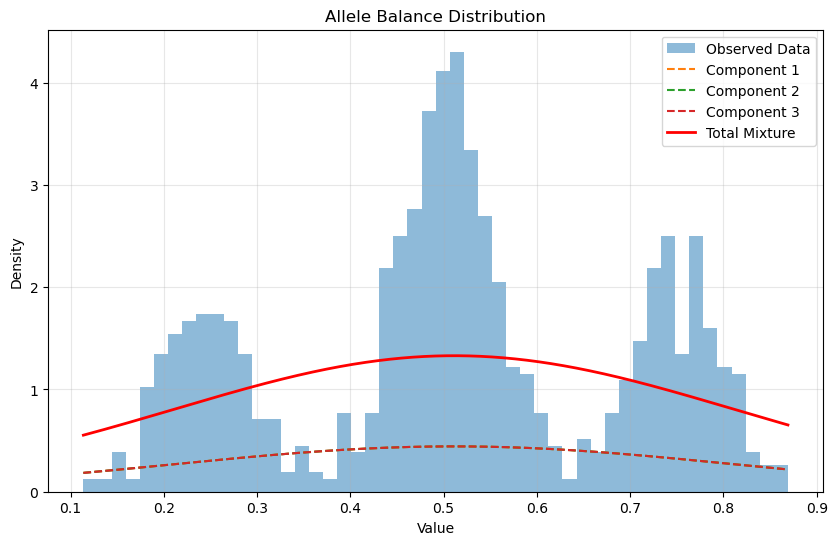

1
Iteration 0: Log Likelihood -9.6469
Iteration 1: Log Likelihood -8.8601
Iteration 2: Log Likelihood -8.1386
Iteration 3: Log Likelihood -7.4965
Iteration 4: Log Likelihood -6.9320
Iteration 5: Log Likelihood -6.4366
Iteration 6: Log Likelihood -6.0003
Iteration 7: Log Likelihood -5.6146
Iteration 8: Log Likelihood -5.2723
Iteration 9: Log Likelihood -4.9672
Iteration 10: Log Likelihood -4.6944
Iteration 11: Log Likelihood -4.4497
Iteration 12: Log Likelihood -4.2297
Iteration 13: Log Likelihood -4.0314
Iteration 14: Log Likelihood -3.8521
Iteration 15: Log Likelihood -3.6896
Iteration 16: Log Likelihood -3.5422
Iteration 17: Log Likelihood -3.4080
Iteration 18: Log Likelihood -3.2859
Iteration 19: Log Likelihood -3.1744
Iteration 20: Log Likelihood -3.0725
Iteration 21: Log Likelihood -2.9792
Iteration 22: Log Likelihood -2.8938
Iteration 23: Log Likelihood -2.8155
Iteration 24: Log Likelihood -2.7437
Iteration 25: Log Likelihood -2.6777
Iteration 26: Log Likelihood -2.6170
Iteration

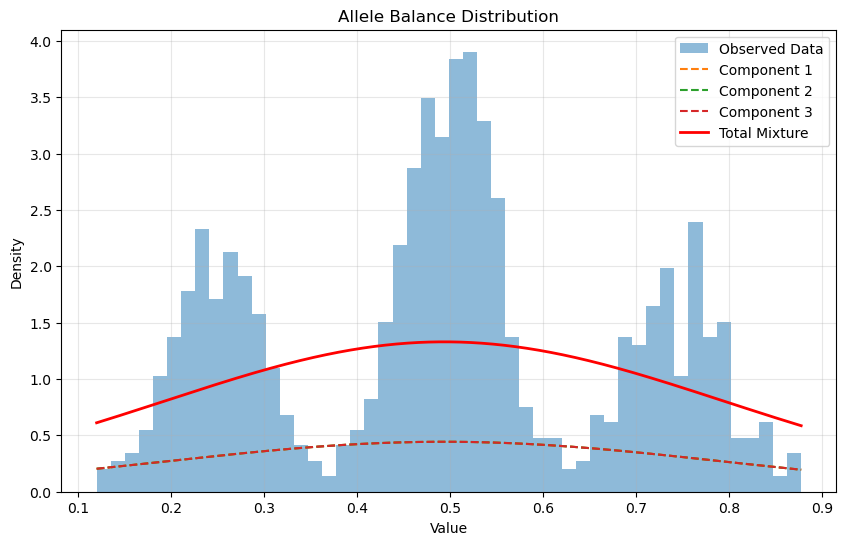

2
Iteration 0: Log Likelihood -9.5869
Iteration 1: Log Likelihood -8.8011
Iteration 2: Log Likelihood -8.0803
Iteration 3: Log Likelihood -7.4413
Iteration 4: Log Likelihood -6.8811
Iteration 5: Log Likelihood -6.3896
Iteration 6: Log Likelihood -5.9569
Iteration 7: Log Likelihood -5.5743
Iteration 8: Log Likelihood -5.2347
Iteration 9: Log Likelihood -4.9321
Iteration 10: Log Likelihood -4.6616
Iteration 11: Log Likelihood -4.4191
Iteration 12: Log Likelihood -4.2009
Iteration 13: Log Likelihood -4.0043
Iteration 14: Log Likelihood -3.8265
Iteration 15: Log Likelihood -3.6655
Iteration 16: Log Likelihood -3.5194
Iteration 17: Log Likelihood -3.3865
Iteration 18: Log Likelihood -3.2654
Iteration 19: Log Likelihood -3.1549
Iteration 20: Log Likelihood -3.0540
Iteration 21: Log Likelihood -2.9617
Iteration 22: Log Likelihood -2.8771
Iteration 23: Log Likelihood -2.7996
Iteration 24: Log Likelihood -2.7284
Iteration 25: Log Likelihood -2.6631
Iteration 26: Log Likelihood -2.6031
Iteration

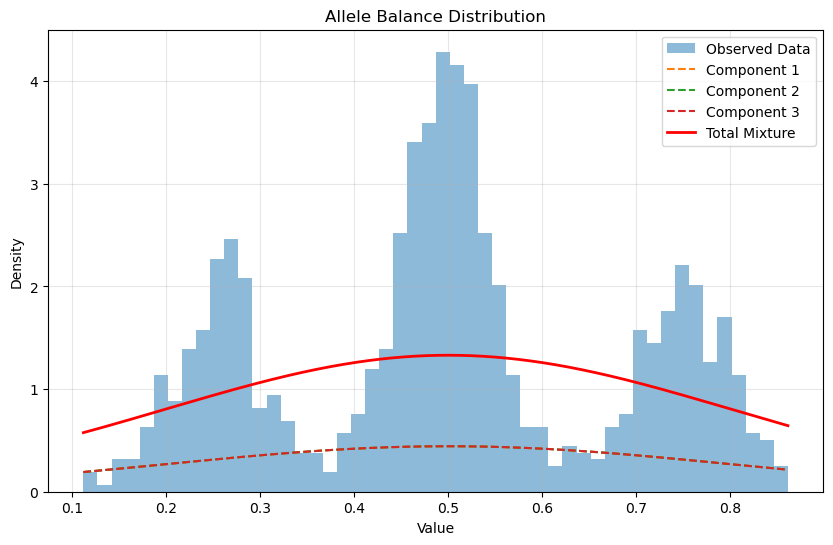

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from scipy.stats import norm

"""
Gaussian Mixture Model (GMM) using PyTorch
This code implements a simple Gaussian Mixture Model (GMM) using PyTorch.
It includes methods for fitting the model to data and calculating the likelihood of new data points.
"""

class GaussianMixture(nn.Module):
    def __init__(self, n_components):
        super(GaussianMixture, self).__init__()
        self.n_components = n_components
        
        # Initialize parameters
        self.means = nn.Parameter(torch.linspace(0.1, 0.9, n_components))
        self.stds = nn.Parameter(torch.ones(n_components) * 0.1)  # Smaller initial std
        self.weights = nn.Parameter(torch.ones(n_components) / n_components)
        self.best_likelihood = -float('inf')
        self.best_params = None
        
    def forward(self, x):
        # Expand dimensions for broadcasting
        x = x.unsqueeze(-1)  # Shape: (n_samples, 1)
        
        # Calculate Gaussian probability for each component
        gaussian_prob = torch.exp(-0.5 * ((x - self.means) / self.stds)**2) / (self.stds * torch.sqrt(torch.tensor(2 * np.pi)))
        
        # Weight the probabilities
        weighted_prob = self.weights * gaussian_prob
        
        # Sum probabilities for all components
        return torch.sum(weighted_prob, dim=1)
    
    def fit(self, data, n_iterations=2000, lr=0.005, patience=100):
        optimizer = optim.Adam(self.parameters(), lr=lr)
        scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=50)
        x = torch.from_numpy(data).float()
        no_improve = 0
        best_loss = float('inf')
        
        for i in range(n_iterations):
            optimizer.zero_grad()
            likelihood = self.forward(x)
            ##print(likelihood)
            # Calculate loss (negative log likelihood)
            # Note: Adding a small value to avoid log(0)
            # This is a common practice to prevent numerical instability
            # and ensure the log likelihood is well-defined
            # In practice, you might want to use a more sophisticated loss function
            # that takes into account the specific characteristics of your data
            # For example, you could use a Gaussian negative log likelihood
            # or a more complex loss function that incorporates prior knowledge
            # about the data distribution.
            # Here, we use a simple negative log likelihood for demonstration purposes
            # This is a placeholder and should be replaced with a more appropriate loss function
            # for your specific use case.
            loss = -torch.mean(torch.log(likelihood + 1e-10))  # Negative log likelihood
            # Add regularization to prevent components from collapsing
            reg_term = 0.1 * torch.sum(1.0 / (self.stds + 1e-6))
            loss = loss + reg_term
            current_likelihood = -loss.item()
            if current_likelihood > self.best_likelihood:
                self.best_likelihood = current_likelihood
                self.best_params = {
                    'means': self.means.data.clone(),
                    'stds': self.stds.data.clone(),  
                    'weights' : self.weights.data.clone()
                }
                print(f'Iteration {i}: Log Likelihood {current_likelihood:.4f}')
                no_improve = 0
            else:
                no_improve += 1

            if no_improve > patience:
                print(f'Early stopping at iteration {i} due to no improvement.')
                break


            loss.backward()

            # Gradient clipping to prevent explosive gradients
            torch.nn.utils.clip_grad_norm_(self.parameters(), 1.0)

            optimizer.step()
            scheduler.step(current_likelihood)

            
            # Ensure weights sum to 1
            with torch.no_grad():
                self.weights.data = torch.softmax(self.weights.data, dim=0)
                self.stds.data = torch.clamp(self.stds.data, min=0.01, max=0.3)
                self.means.data = torch.clamp(self.means.data, min=0.0, max=1.0)

        with torch.no_grad():
            self.means.data = self.best_params['means']
            self.stds.data = self.best_params['stds']
            self.weights.data = self.best_params['weights']


def fit_gmm_to_ab(ind_dat, n_components):
    """
    Fit Gaussian Mixture Model (GMM) to allele balance data.
    
    Parameters:
        ab_dat (np.array): Allele balance data.
        n_components (int): Number of components in the GMM.
    """
    dat = ind_dat
    # Reshape the array to 2D if necessary
    # Example: allele_balance_array = np.random.rand(100, 10)  # Replace with actual data
    if len(ind_dat.shape) == 1:
        dat = ind_dat.reshape(-1, 1)
    # Fit GMM to allele balance data   
    gmm = GaussianMixture(n_components=n_components)
    gmm.fit(dat)
    # Print best likelihood
    print(f'Best likelihood: {gmm.best_likelihood}')
    # Print fitted parameters
    print("Fitted GMM parameters:")
    print(f"Means: {gmm.means.data.numpy()}")
    print(f"Std devs: {gmm.stds.data.numpy()}")
    print(f"Weights: {gmm.weights.data.numpy()}")
    return(gmm)

def plot_gmm_fit(data, gmm, n_points=1000, title="GMM Fit to Data"):
    """
    Plot histogram of observed data with fitted GMM components.
    
    Parameters:
        data (np.array): Original data used to fit the GMM
        gmm (GaussianMixture): Fitted GMM model
        n_points (int): Number of points for plotting the GMM curves
        title (str): Plot title
    """
    # Create figure
    plt.figure(figsize=(10, 6))
    
    # Plot histogram of observed data
    plt.hist(data, bins=50, density=True, alpha=0.5, label='Observed Data')
    
    # Generate points for plotting the GMM components
    x = np.linspace(min(data), max(data), n_points)
    x_tensor = torch.from_numpy(x).float()
    
    # Plot individual components
    for i in range(gmm.n_components):
        # Calculate Gaussian distribution for this component
        mu = gmm.means.data[i].item()
        sigma = gmm.stds.data[i].item()
        weight = gmm.weights.data[i].item()
        
        component = weight * norm.pdf(x, mu, sigma)
        plt.plot(x, component, '--', label=f'Component {i+1}')
    
    # Plot total mixture
    total = torch.zeros_like(x_tensor)
    for i in range(gmm.n_components):
        mu = gmm.means.data[i]
        sigma = gmm.stds.data[i]
        weight = gmm.weights.data[i]
        component = weight * torch.exp(-0.5 * ((x_tensor - mu) / sigma)**2) / (sigma * torch.sqrt(torch.tensor(2 * np.pi)))
        total += component
    
    plt.plot(x, total.numpy(), 'r-', label='Total Mixture', linewidth=2)
    
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.title(title)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()



#allele_balance_array = np.random.rand(1000, 3)
ab_left = np.random.normal(0.25, 0.05, (500, 3))
ab_middle = np.random.normal(0.5, 0.05, (1000, 3))
ab_right = np.random.normal(0.75, 0.05, (500,3))
allele_balance_array = np.concatenate([ab_left, ab_middle, ab_right], axis=0)
print(allele_balance_array)
allele_mask_array = np.random.randint(0, 2, size=(2000, 3))
ab_dat = np.array([allele_balance_array,allele_mask_array])
#print(ab_dat)
for i in range(len(ab_dat[0,0,:])):
    print(i)
    ind_dat = ab_dat[0,:,i]
    #print(ind_dat)
    ind_mask = ab_dat[1,:,i] == 1
    #print(ind_mask)
    ind_dat_filtered = ind_dat[ind_mask]
    #print(ind_dat_filtered)
    gmm = fit_gmm_to_ab(ind_dat_filtered, n_components=3)
    plot_gmm_fit(ind_dat_filtered, gmm, title="Allele Balance Distribution")

#print(allele_balance_array)
#print(allele_balance_array[:,2])
#allele_balance_df = pd.DataFrame(allele_balance_array, columns=[f"Sample_{i}" for i in range(1, 11)])
#allele_balance_df['Sample_ID'] = [f"Sample_{i}" for i in range(1, 101)]
#allele_balance_df.set_index('Sample_ID', inplace=True)
#allele_balance_df = allele_balance_df.transpose()
#print(allele_balance_df)
#allele_balance_df = allele_balance_df.reset_index()
#allele_balance_df.rename(columns={'index': 'Sample_ID'}, inplace=True)